# <b> K Nearest Neighbors

## <b>Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## <b>Importando o dataset

In [174]:
data = pd.read_csv("project_data", index_col = 0)

## <b> Visualizando as informações do dataset

In [175]:
# Visualizando as primeiras colunas
data.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## <b> Análise Exploratória dos Dados

/home/carycccs/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/carycccs/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


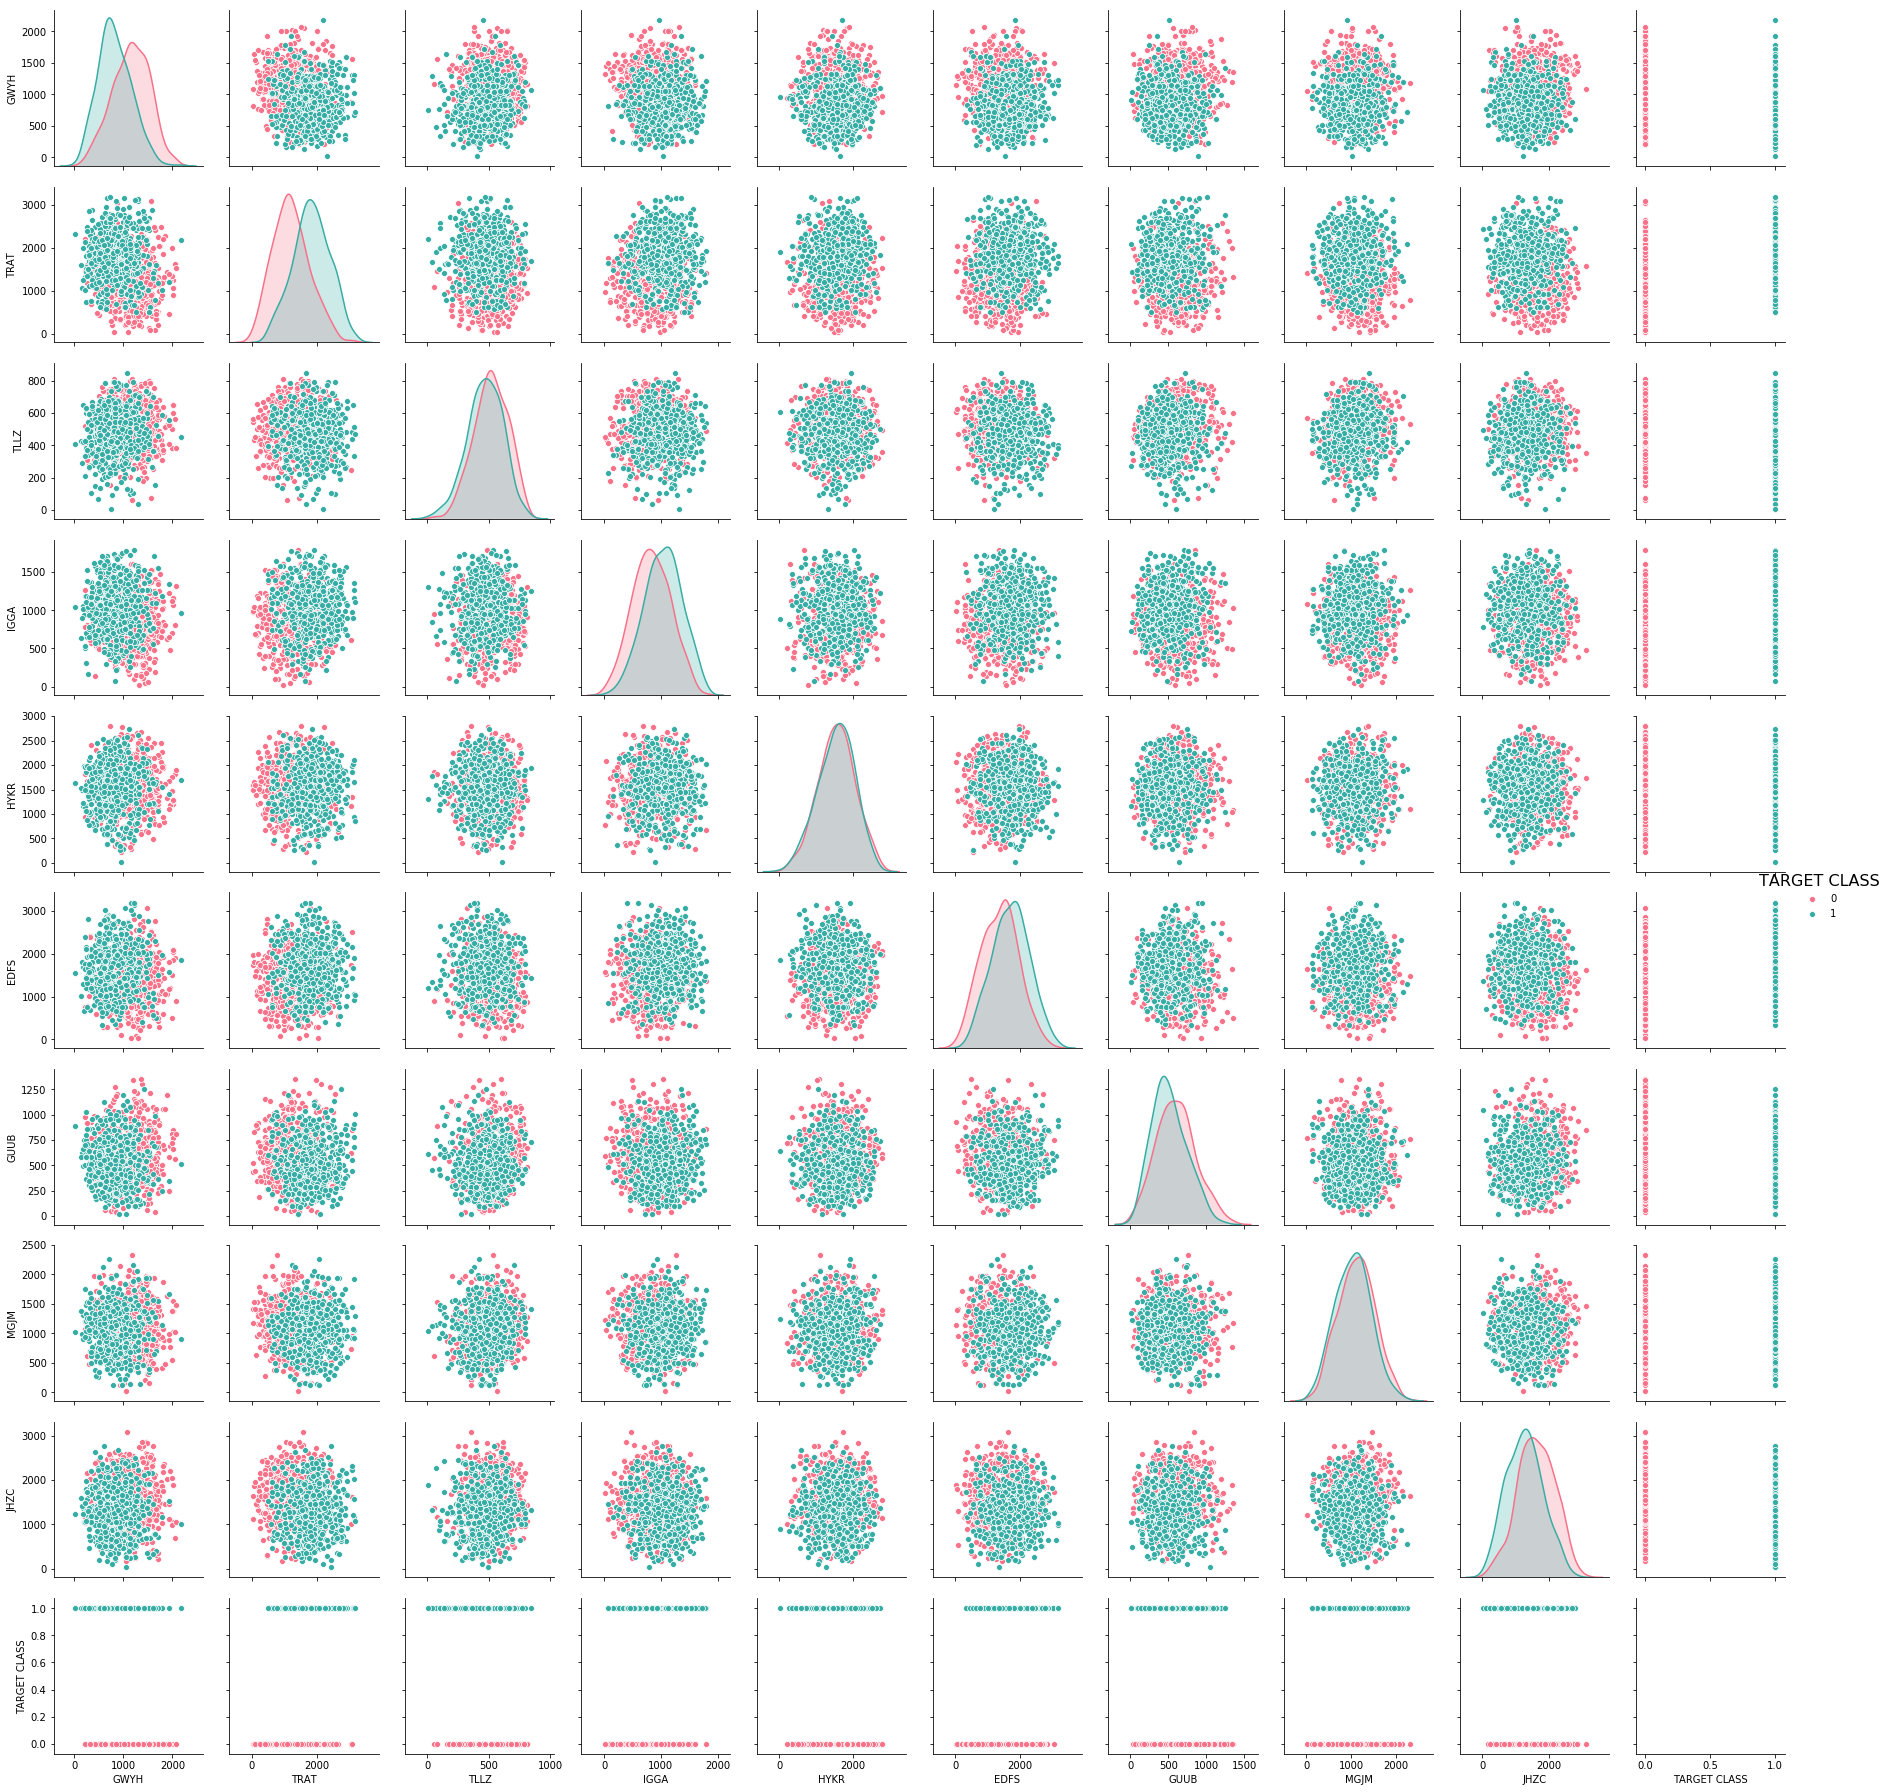

In [199]:
# Visualizando as relações entre variáveis (tonalidade especificada pelo Target Class)
g = sns.pairplot(data, hue = 'TARGET CLASS', palette="husl")
g._legend.get_title().set_fontsize(16)

## <b> Padronização das Variáveis

Aplicando uma Normalização nos Dados

In [177]:
# Importando o StandardScaler do SKLearn
from sklearn.preprocessing import StandardScaler

In [178]:
# Criando um objeto do tipo StandardScaler
scaler = StandardScaler()

In [179]:
# Separando os dados em X e y
X = data.drop('TARGET CLASS', axis = 1)
y = data['TARGET CLASS']

In [180]:
X.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
XVPM,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [181]:
y.head()

XVPM
1636.670614    0
1013.402760    1
1300.035501    1
1059.347542    0
1018.340526    0
Name: TARGET CLASS, dtype: int64

In [182]:
# Usando o método fit para treinar o modelo
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [183]:
# Padronizando os dados do modelo  com o método trasform
padronizados = scaler.transform(X)

In [184]:
# Visualizando em um DataFrame os dados padronizados e adicionando as 
# colunas do Dataset Original exceto o target
dataPad = pd.DataFrame(padronizados, columns = data.columns[:-1])
dataPad.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## <b> Divisão dos Dados em Treino e Teste

In [185]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split 

In [186]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
XVPM,,,,,,,,,
1650.795621,826.511884,1722.197590,573.286913,1551.853454,1657.735369,1469.926830,428.733234,624.560343,1736.525012
1131.805998,1190.953437,2571.975599,611.920236,1359.029751,1850.944537,1883.913657,238.409133,1553.510483,1224.755606
953.997727,927.298187,1455.198509,355.497555,1285.026758,1709.379370,863.315059,654.361893,123.492038,1895.744710
787.372965,917.219964,783.663812,484.475203,611.501868,1878.078574,1434.699773,249.444559,680.743483,1348.334382
1041.610663,473.833234,2107.793433,621.023051,734.925996,1837.563420,1824.772929,247.881951,1106.476038,1361.736287


## <b>  Aplicando o KNN

In [187]:
# Importando o classificador do sklearn
from sklearn.neighbors import KNeighborsClassifier

In [188]:
# Criando uma instância com 1 vizinho
knn = KNeighborsClassifier(n_neighbors = 1)

In [189]:
# Ajustando o modelo KNN aos dados de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## <b> Previsões e Avaliações

In [190]:
# Prevendo valores do teste
predicao = pred = knn.predict(X_test)

In [191]:
# Matriz de confusão e relório de classificação
from sklearn.metrics import classification_report,confusion_matrix

In [192]:
# Matriz de confusão
print(confusion_matrix(y_test,pred))

[[ 96  58]
 [ 32 114]]


In [193]:
# Relatório de classificação
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       154
           1       0.66      0.78      0.72       146

   micro avg       0.70      0.70      0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.71      0.70      0.70       300



 ## <b> Escolhendo o valor K

Para fazer a análise e escolher um valor K fazemos uma avaliação entre o valor predito e 
o valor encontrado no teste e plotamos um gráfico para avaliar a taxa de erro. Essa avaliação consiste em classificar, ajustar e predizer novamente os valores a cada novo número de vizinhos
(de 1 a 40) adicionando ao vetor error_rate a média da diferença entre o valor predito e o valor treinado. 

In [194]:
error_rate = []

for i in range(1,40):    
    # classificação
    knn = KNeighborsClassifier(n_neighbors=i) 
    # ajuste
    knn.fit(X_train,y_train) 
    # predição
    pred_i = knn.predict(X_test) 
    # média da diferença
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

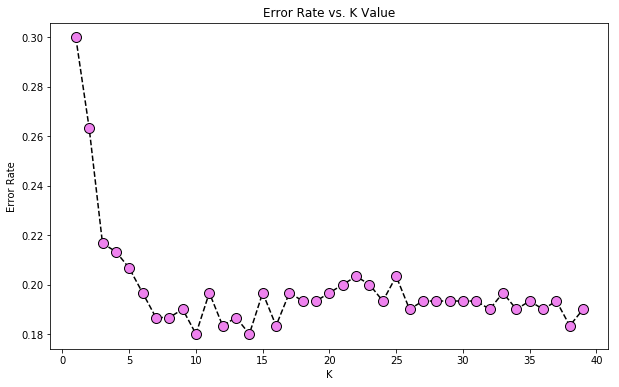

In [195]:
# Plotando as informações obtidas
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='violet', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

A taxa de erro a partir do k > 26 tende a se manter igual.

## <b> Treinando o Modelo Novamente com Novo Valor K

In [196]:
# Comparação para K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[ 96  58]
 [ 32 114]]
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       154
           1       0.66      0.78      0.72       146

   micro avg       0.70      0.70      0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.71      0.70      0.70       300



In [198]:
# Comparação para K = 30 (baseado no gráfico de análise de K)
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[120  34]
 [ 23 123]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       154
           1       0.78      0.84      0.81       146

   micro avg       0.81      0.81      0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Fazendo uso do K baseado no gráfico acima, obtivemos uma precisão maior em relação ao k =1 inicial